<a href="https://colab.research.google.com/github/michalastocki/convnet-course/blob/master/01_mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trenowanie prostej sieci neuronowej na zbiorze MNIST

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Załadowanie danych

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### Eksploracja danych


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba dabych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba dabych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


### Wyświetlenie obrazka

(-0.5, 27.5, 27.5, -0.5)

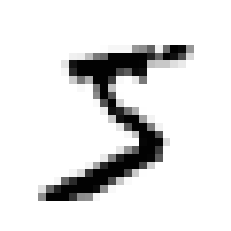

In [0]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

### Wyświetlenie kilku obrazków

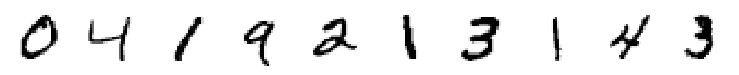

In [0]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

### Wyświetlenie danych

[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


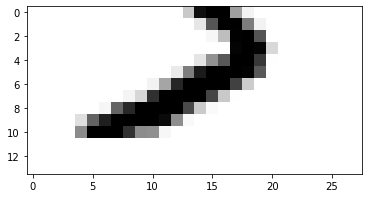

In [0]:
print(X_train[0][10])

# dolna połówka obrazka
plt.imshow(X_train[0][14:], cmap='Greys')

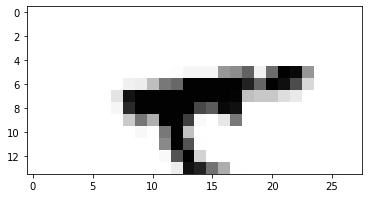

In [0]:
# górna połówka obrazka
plt.imshow(X_train[0][:14], cmap='Greys')

### Przycinanie obrazka

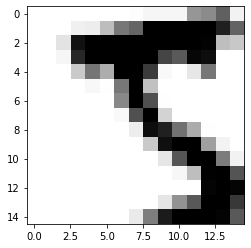

In [0]:
plt.imshow(X_train[0][5:20, 5:20], cmap='Greys')

### Wyświetlenie etykiet

In [0]:
print('y_train:', y_train)
print('y_train shape:', y_train.shape)

y_train: [5 0 4 ... 5 6 8]
y_train shape: (60000,)


## Przygotowanie danych

In [0]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Przygotowanie etykiet 

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Budowa modelu

In [0]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Kompilacja modelu

In [0]:
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Trenowanie modelu

In [0]:
history = model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=20,
                   validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0043 - acc: 0.9990 - val_loss: 0.1507 - val_acc: 0.9818
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0048 - acc: 0.9989 - val_loss: 0.1392 - val_acc: 0.9831
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0055 - acc: 0.9987 - val_loss: 0.1477 - val_acc: 0.9824
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0046 - acc: 0.9990 - val_loss: 0.1441 - val_acc: 0.9837
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0046 - acc: 0.9989 - val_loss: 0.1446 - val_acc: 0.9838
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0044 - acc: 0.9989 - val_loss: 0.1396 - val_acc: 0.9835
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0042 - acc: 0.9990 - val_loss: 0.1457 - val_acc

### Ocena modelu

In [0]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 36us/step
Test loss: 0.17966892649762997
Test accuracy: 0.9824


### Wykres dokładności

In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

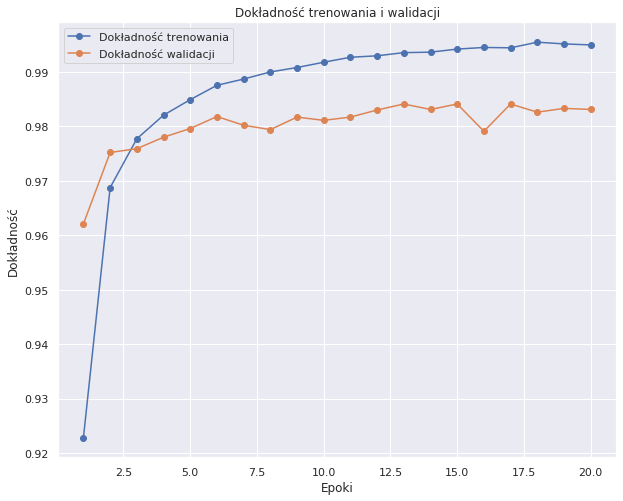

In [0]:
make_accuracy_plot(history)

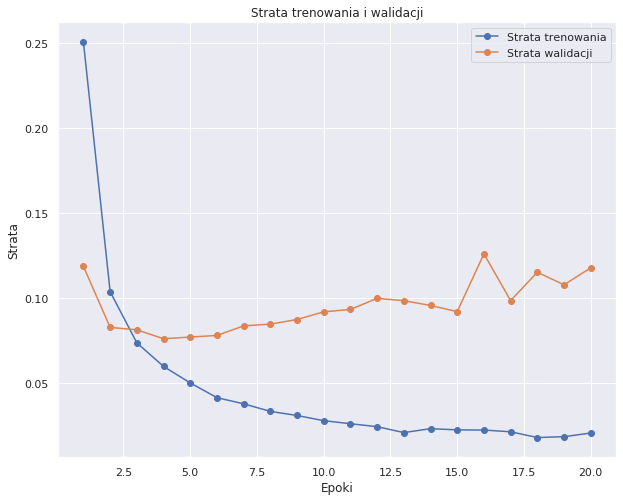

In [0]:
make_loss_plot(history)

### Budowa modelu z warstwami Dropout

In [0]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=20,
                   validation_data=(X_test, y_test))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________________________

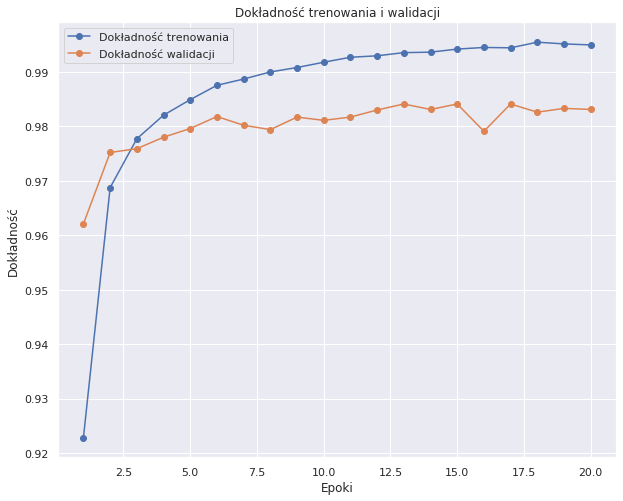

In [0]:
make_accuracy_plot(history)

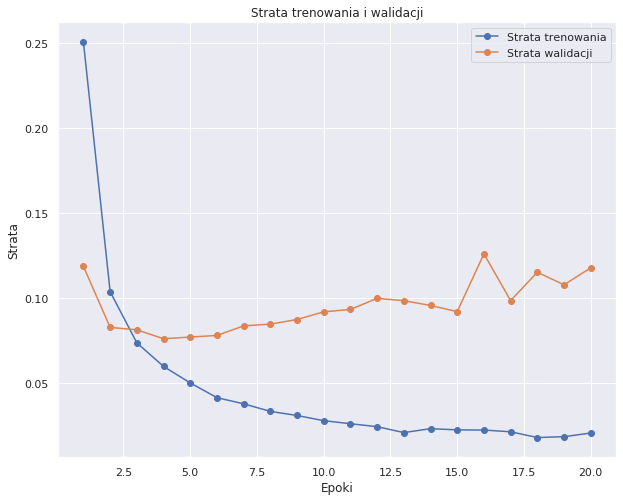

In [0]:
make_loss_plot(history)